# Algorirmo das k-médias

O algoritmo das k-médias é um método de clusterização que objetiva encontrar os $k$ centróides de um conjunto de observações. Este método é muito utilizado nas áreas ligadas a inteligência artificial, aprendizado de máquinas, quantização vetorial, etc. O mais usual é a formulação de Lloyd que será apresentada a seguir.

Na processo de clusterização do k-médias, "cada *cluster* é representado por um único ponto, ao qual associam-se todos os pontos contidos neste *cluster*. Os pontos pertencentes a um de terminado *cluster* estão mais próximos (segundo uma determinada métrica) ao ponto de representação associado ao seu *cluster* do que a qualquer outro ponto de representação. O problema de *clusterização* do $k$-médias resume-se no problema de se encontrar o conjunto $\mathcal{C} = \{\hat{x}_1, \ldots, \hat{x}_k\}$ de $k$ pontos de representação para os $k$ *clusters* que irão se formar.

Lloyd (1982) propôs um método iterativo, chamado de 'método I', para o projeto de um quantizador escalar. Este método foi estendido por Linde et al. (1980) para o caso vetorial. O algoritmo para o caso de dados com uma distribuição de probabilidade desconhecida é dado a seguir:

1. Seja $M$ o número de pontos de representação e $\epsilon \geq 0$, um limiar de distorção. Considere um conjunto de representação inicial $\mathcal{C}^{(0)} = \{\hat{x}_1^{(0)} , \ldots, \hat{x}_M^{(0)}\}$, um conjunto de treinamento $\mathcal{T} = \{x_1, \ldots, x_N\}$ e $m=0$, o número inicial de iterações.
2. Dado $\mathcal{C}^{(m)}$ encontre a partição mínima $P(\mathcal{C}^{(m)}) = \{S_i^{(m)}: i=1,\ldots,M\}$
das sequências de treinamento: $x_j \in S_i^{(m)}$ se $d(x_j, \hat{x}_i^{(m)}) \leq d(x_j, \hat{x}_l^{(m)})$, para
todo $l \neq i$. Calcule, então, a distorção média definida por:

$ D^{(m)} = D[(\mathcal{C}^{(m)}, P(\mathcal{C}^{(m)}))] \\
  D^{(m)} = \frac{1}{N} \sum_{j=1}^{N} \min_{\hat{x} \in \mathcal{C}^{(m)}} d(x_j, \hat{x}) .$
  
3. Se $(D^{(m-1)} - D^{(m)}) / D^{(m)} \leq \epsilon$, interrompe a iteração e considera-se $\mathcal{C}^{(m)}$ como o alfabeto final de representação (*codebook*); caso contrário, continue.

4. Encontre o alfabeto ótimo de representação para $P(\mathcal{C}^{(m)})$, $\hat{x}(P(\mathcal{C}^{(m)})) = \{\hat{x}(S_i): i = 1,\ldots, M\}$ para $P(\mathcal{C}^{(m)})$, onde $\hat{x}(S_i) = \frac{1}{|| S_i ||} \sum_{x \in S_i} x $.
5. Faça $\mathcal{C}^{(m+1)} = \hat{x}(P(\mathcal{C}^{(m)}))$, incremente $m$ e volte ao passo 2.

O algoritmo descrito acima utiliza um determinado $\mathcal{C}^{(0)}$ como *codebook* (conjunto de centróides) inicial para o processo de otimização. Existem diversas maneiras de escolher um alfabeto inicial, a mais simples delas consiste em escolher pontos de representação espaçados e coincidentes com os dados de treinamento, ou seja, os dados utilizados para se estabelecer o *codebook*.

O problema das $k$ médias é um problema NP-difícil, desta forma, qualquer algoritmo utilizável levará a uma solução ótima local para o problema. Métodos iterativos, como o de Lloyds, garantem melhorias sucessivas na solução a partir de um ponto inicial. Como a função de minimização, em geral, não é convexa, cada mínimo local terá uma região de atração para si. Os parâmetros de inicialização podem levar a diferentes soluções, algumas melhores que as demais."

(Araujo, Sansao, Fasolo, *Quantização Vetorial de Cores em Imagens Digitais*, SBRT 2018)


https://en.wikipedia.org/wiki/K-means_clustering


O GNU Octave possui a função *kmeans*. Nesta primeira demonstração não iremos utilizar tal função.

### demonstração

Vamos gerar 4 conjuntos com 50 pontos distribuídos aleatoriamente em cada um, cada um com um determinado ponto central e variância.

In [6]:
function P = gerapontos(N,m,d), P = []; P(1,:) = d*randn(1,N) + m(1); P(2,:) = d*randn(1,N) + m(2); endfunction

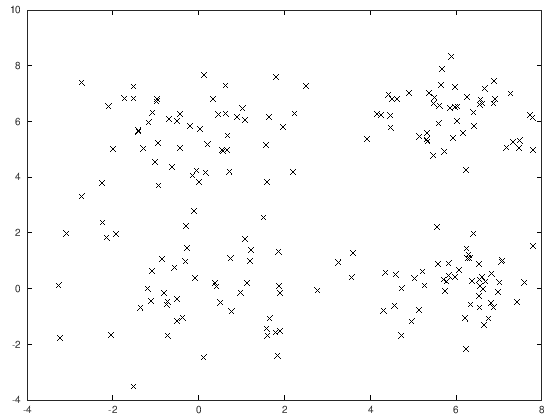

In [8]:
N = 50;
P = [];
P = [P gerapontos(50,[0 0],1.5)];
P = [P gerapontos(50,[6 6],1)];
P = [P gerapontos(50,[0 6],1.2)];
P = [P gerapontos(50,[6 0],1)];
plot(P(1,:),P(2,:),'kx','markersize',5);

Sabemos que existem 4 grupos, por isso iremos definir $k=4$. Iremos definer também 4 estilos de marcador para associar a cada um dos grupos. Inicialmente não sabemos a qual grupo cada um dos pontos pertencem, por isso todos estão marcados com 'x' preto.

In [14]:
k = 4;
colors = [1 0 0; 0 1 0; 0 0 1; 1 1 0];
[m,n] = size(P); % m (dimentionality), n (number of samples)

Vamos definir aleatóriamente $k$ centróides (*codebook* inicial). Uma boa estratégia é supor que esses $k$ centroídese sejam coincidentes com $k$ pontos escolhidos aleatoriamente dentre os pontos da base de dados.

In [11]:
center = P(:,randperm(n,k));

Para fazer a associação entre pontos e centróides, devemos utilizar alguma métrica. Iremos utilizar nesta demostração a distância euclideana. Dependendo do problema, outras métricas poderão ser mais apropriadas.

In [12]:
function d = distance(p1,p2), 
  d=[]; 
  for i=1:size(p1,2), for j=1:size(p2,2), 
    d(i,j)=sqrt(sum((p1(:,i)-p2(:,j)).^2)); 
  endfor; endfor; 
endfunction

Devemos definir um número máximo de iterações para garantir que o algoritmo finalizará. Neste exemplo, para ilustração, iremos realizar apenas 3 iterações.

In [13]:
cMAX = 3;

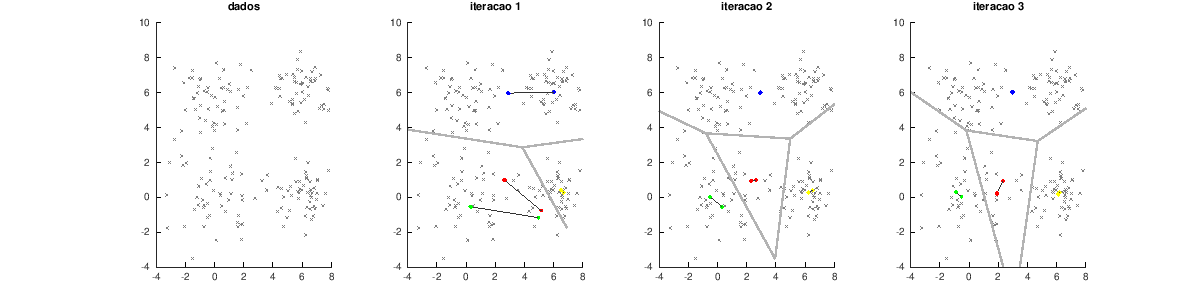

In [15]:
figure('Position',[0 0 1200 300]);
subplot(1,cMAX+1,1);
scatter(P(1,:),P(2,:),50,[0.5 0.5 0.5],'x');
ax = axis; title('dados');

dist_c = 1000; count = 0;
while dist_c > 0.001 && count < cMAX,
  count = count + 1;
  subplot(1,cMAX+1,count+1);
  scatter(P(1,:),P(2,:),50,[0.5 0.5 0.5],'x'); hold on;
  scatter(center(1,:),center(2,:),70,colors,'d','filled');
  title(cstrcat('iteracao ',num2str(count)));

  [vx, vy] = voronoi(center(1,:), center(2,:));
  plot (vx, vy, '-', 'linewidth',5, 'color', [0.7 0.7 0.7]);

  % calculate distances
  d = distance(P,center);

  % create labels
  label = [];
  for j=1:n,
      [mini, idx] = min(d(j,:));
      label(j) = idx;
  end;

  %calculate new centers
  dist_c = 0;
  center_new = [];
  [label2, ii] = sort(label);
  for i = 1 : k,
     temp = [];
     for j = 1 : n,
        if label2(j) == i,
           temp = [label2(j) ii(j); temp];
        endif;
     endfor;
     center_new(:,i) = mean(P(:,temp(:,2)),2);
  endfor;

  % distancia dos centroides novos para os velhos
  Dc = distance(center,center_new);
  % distancia apenas entre os centroides equivalentes
  dc = []; for i = 1 : size(Dc,1),  dc(i) = Dc(i,i);  end;
  % achar a maior distancia
  dist_c = max(dc);

  % atualiza os centroides
  for i = 1 : k,
    line([center(1,i) center_new(1,i)],[center(2,i) center_new(2,i)],'linewidth',3,'color',[0.2 0.2 0.2]);
  end;

  scatter(center_new(1,:),center_new(2,:),90,colors,'d','filled');
  axis(ax);
  center = center_new;
end;

Veja as notas sobre quantização onde há um exemplo de utilização do método das k-médias para definição de uma palheta de cores para realizar a quantização vetorial das cores de uma imagem.